In [3]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
!pip install chart_studio

In [6]:
import chart_studio.plotly as py



In [7]:
df=pd.read_csv('C:\\Users\\mstas\\Desktop\\Project 3\\ufo_sighting_data.csv', dtype={'length_of_encounter_seconds': 'string','latitude': 'string'})
print('Global UFO Sightings /n')
print(df.columns.values)
df.head

Global UFO Sightings /n
['Date_time' 'city' 'state/province' 'country' 'UFO_shape'
 'length_of_encounter_seconds' 'described_duration_of_encounter'
 'description' 'date_documented' 'latitude' 'longitude' 'type']


<bound method NDFrame.head of               Date_time                  city state/province country  \
0      10/10/1949 20:30            san marcos             tx      us   
1      10/10/1949 21:00          lackland afb             tx     NaN   
2      10/10/1955 17:00  chester (uk/england)            NaN      gb   
3      10/10/1956 21:00                  edna             tx      us   
4      10/10/1960 20:00               kaneohe             hi      us   
...                 ...                   ...            ...     ...   
80327    9/9/2013 21:15             nashville             tn      us   
80328    9/9/2013 22:00                 boise             id      us   
80329    9/9/2013 22:00                  napa             ca      us   
80330    9/9/2013 22:20                vienna             va      us   
80331    9/9/2013 23:00                edmond             ok      us   

      UFO_shape length_of_encounter_seconds described_duration_of_encounter  \
0      cylinder           

In [8]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors="coerce")
df.dropna(axis=0, inplace=True)
#pd.options.display.float_format='{:,.2f}'.format

df

Date_time        city state/province country UFO_shape  \
0      10/10/1949 20:30  san marcos             tx      us  cylinder   
3      10/10/1956 21:00        edna             tx      us    circle   
4      10/10/1960 20:00     kaneohe             hi      us     light   
5      10/10/1961 19:00     bristol             tn      us    sphere   
7      10/10/1965 23:45     norwalk             ct      us      disk   
...                 ...         ...            ...     ...       ...   
80327    9/9/2013 21:15   nashville             tn      us     light   
80328    9/9/2013 22:00       boise             id      us    circle   
80329    9/9/2013 22:00        napa             ca      us     other   
80330    9/9/2013 22:20      vienna             va      us    circle   
80331    9/9/2013 23:00      edmond             ok      us     cigar   

       length_of_encounter_seconds described_duration_of_encounter  \
0                           2700.0                      45 minutes   
3                             20.0                        1/2 hour   
4                            900.0                      15 minutes   
5                            300.0                       5 minutes   
7                           1200.0                      20 minutes   
...                            ...                             ...   
80327                        600.0                      10 minutes   
80328                       1200.0                      20 minutes   
80329                       1200.0                            hour   
80330                          5.0                       5 seconds   
80331                       1020.0                      17 minutes   

                                             description date_documented  \
0      This event took place in early fall around 194...       4/27/2004   
3      My older brother and twin sister were leaving ...       1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...       1/22/2004   
5      My father is now 89 my brother 52 the girl wit...       4/27/2007   
7      A bright orange color changing to reddish colo...       10/2/1999   
...                                                  ...             ...   
80327  Round from the distance/slowly changing colors...       9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...       9/30/2013   
80329                                       Napa UFO&#44       9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...       9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...       9/30/2013   

        latitude   longitude type  
0      29.883056  -97.941111  UFO  
3      28.978333  -96.645833  UFO  
4      21.418056 -157.803611  UFO  
5      36.595000  -82.188889  UFO  
7      41.117500  -73.408333  UFO  
...          ...         ...  ...  
80327  36.165833  -86.784444  UFO  
80328  43.613611 -116.202500  UFO  
80329  38.297222 -122.284444  UFO  
80330  38.901111  -77.265556  UFO  
80331  35.652778  -97.477778  UFO  

[66516 rows x 12 columns]

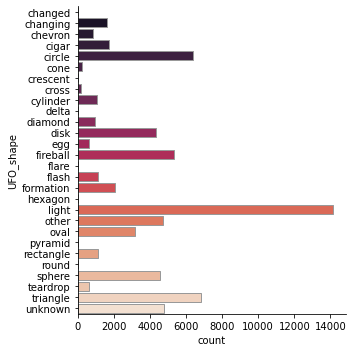

In [9]:

sns.catplot(y="UFO_shape", kind="count",
             palette="rocket",edgecolor='.6',
          data=df.sort_values("UFO_shape"))

In [13]:
df = df[df["length_of_encounter_seconds"] <= 4000]
df.describe()

length_of_encounter_seconds      latitude     longitude
count                 63987.000000  63987.000000  63987.000000
mean                    474.903627     38.704452    -95.270079
std                     766.744530      5.835654     18.482621
min                       0.010000    -37.813938   -176.658056
25%                      30.000000     34.197500   -114.272778
50%                     180.000000     39.261667    -89.536111
75%                     600.000000     42.331389    -80.393750
max                    3900.000000     72.700000    153.099533

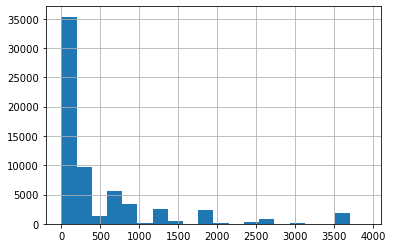

In [14]:
hist = df["length_of_encounter_seconds"].hist(bins=20)

In [8]:
df_anomaly =df[df['length_of_encounter_seconds']> 4000]
df_anomaly.count()

Date_time                          2529
city                               2529
state/province                     2529
country                            2529
UFO_shape                          2529
length_of_encounter_seconds        2529
described_duration_of_encounter    2529
description                        2529
date_documented                    2529
latitude                           2529
longitude                          2529
type                               2529
dtype: int64

In [9]:
df_anomaly.head()

Date_time                    city state/province country  \
68   10/10/1997 16:00            connersville             in      us   
80   10/10/1998 22:30  st. john&#39s (canada)             nf      ca   
88   10/10/1999 21:00                  rachel             nv      us   
122  10/10/2003 20:25              temperance             mi      us   
123  10/10/2003 21:10          crescent beach             sc      us   

     UFO_shape  length_of_encounter_seconds described_duration_of_encounter  \
68       delta                      14400.0                         4 hours   
80         egg                       7200.0                         2 hours   
88       light                      10800.0                         3 hours   
122       oval                      18000.0                    over 5 hours   
123  formation                      37800.0                       1 1/2 hr.   

                                           description date_documented  \
68   3 differants types &#44 cluster &#44delta &#44...       1/28/1999   
80   Started off as 3 points of intense yellow ligh...       12/2/2000   
88   Bright lights with incredible agility seen fro...       5/24/2005   
122  pulsating green white and red object in the no...      10/31/2003   
123  For two consecutive nights&#44 we watched a pa...       1/17/2004   

      latitude   longitude type  
68   39.641111  -85.141111  UFO  
80   47.550000  -52.666667  UFO  
88   37.644722 -115.742778  UFO  
122  41.779167  -83.568889  UFO  
123  33.807500  -78.701111  UFO

In [10]:
df_anomaly.rename( columns={"state/province":"state","length_of_encounter_seconds":"encounter_seconds", "date/time":"date"}, inplace=True)

C:\Users\mstas\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
#blank column
df_anomaly["season"]=""


C:\Users\mstas\AppData\Local\Temp/ipykernel_21808/1664706181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomaly["season"]=""


In [16]:
df_anomaly["type"]="UFO"

In [17]:
df_anomaly.columns

Index(['description', 'city', 'state', 'country', 'type', 'latitude',
       'longitude', 'encounter_seconds', 'season'],
      dtype='object')

In [18]:
df_anomaly=df_anomaly[["description","city","state","country","type","latitude","longitude","encounter_seconds","season"]]

In [19]:
engine = create_engine("sqlite:///paranormal_activity.db")
df_anomaly.to_sql(name="paranormal", con=engine, if_exists="append", index=False)
pd.read_sql_query("select * from paranormal", con=engine).head()

description                    city  \
0  3 differants types &#44 cluster &#44delta &#44...            connersville   
1  Started off as 3 points of intense yellow ligh...  st. john&#39s (canada)   
2  Bright lights with incredible agility seen fro...                  rachel   
3  pulsating green white and red object in the no...              temperance   
4  For two consecutive nights&#44 we watched a pa...          crescent beach   

  state country type   latitude   longitude  encounter_seconds season  
0    in      us  UFO  39.641111  -85.141111            14400.0         
1    nf      ca  UFO  47.550000  -52.666667             7200.0         
2    nv      us  UFO  37.644722 -115.742778            10800.0         
3    mi      us  UFO  41.779167  -83.568889            18000.0         
4    sc      us  UFO  33.807500  -78.701111            37800.0